Colab Link: https://colab.research.google.com/drive/1DBoFlqtpY1jBBz2mZRoac2KlQeNLpT3C

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [81]:
df_ts_base = pd.read_csv('data/TimeSeriesData1.csv', dayfirst=True, parse_dates=[0])

## Basic Data Profiling

In [82]:
df_ts_base1 = df_ts_base.copy()
df_ts_base1.head(2)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44


In [83]:
df_ts_base1.tail(2)

,date,spx,dax,ftse,nikkei
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88
6268,2018-01-29,2853.528411,13324.48,7671.533300,23629.34


In [84]:
df_ts_base1.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [33]:
df_ts_base1.describe()

,date,spx,dax,ftse,nikkei
count,6269,6269.000000,6269.000000,6269.000000,6269.000000
mean,2006-01-14 19:36:59.492742144,1288.127542,6080.063363,5422.713545,14597.055700
min,1994-01-07 00:00:00,438.920000,1911.700000,2876.600000,7054.980000
25%,2000-01-11 00:00:00,990.671905,4069.350000,4486.100000,10709.290000
50%,2006-01-12 00:00:00,1233.420000,5773.340000,5662.430000,15028.170000
75%,2012-01-19 00:00:00,1459.987747,7443.070000,6304.250000,17860.470000
max,2018-01-29 00:00:00,2872.867839,13559.600000,7778.637689,24124.150000
std,NaN,487.586473,2754.361032,1145.572428,4043.122953


In [85]:
# Find number of missing elements
df_ts_base1.isna().sum()
# OR df_ts_base1.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [86]:
# Find number missing elements in single col
df_ts_base1.spx.isna().sum()

0

In [87]:
# Find average number of missing elements in each column
df_ts_base1.isna().mean()

date      0.0
spx       0.0
dax       0.0
ftse      0.0
nikkei    0.0
dtype: float64

In [88]:
# Total nulls across all columns
df_ts_base1.isnull().sum().sum()   

0

## Vizualize Data

### Line Chart with multiple columns

In [42]:
df_ts_1 = df_ts_base1.copy()
df_ts_1.set_index("date", inplace = True)
df_ts_1.head(2)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44


In [89]:
df_ts_1.head(2)

,spx,dax,ftse,nikkei,spx_int,date,date1
date,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469,1994-01-07,1994-01-07
1994-01-10,475.27,2225.00,3440.58,18443.44,475,1994-01-10,1994-01-10


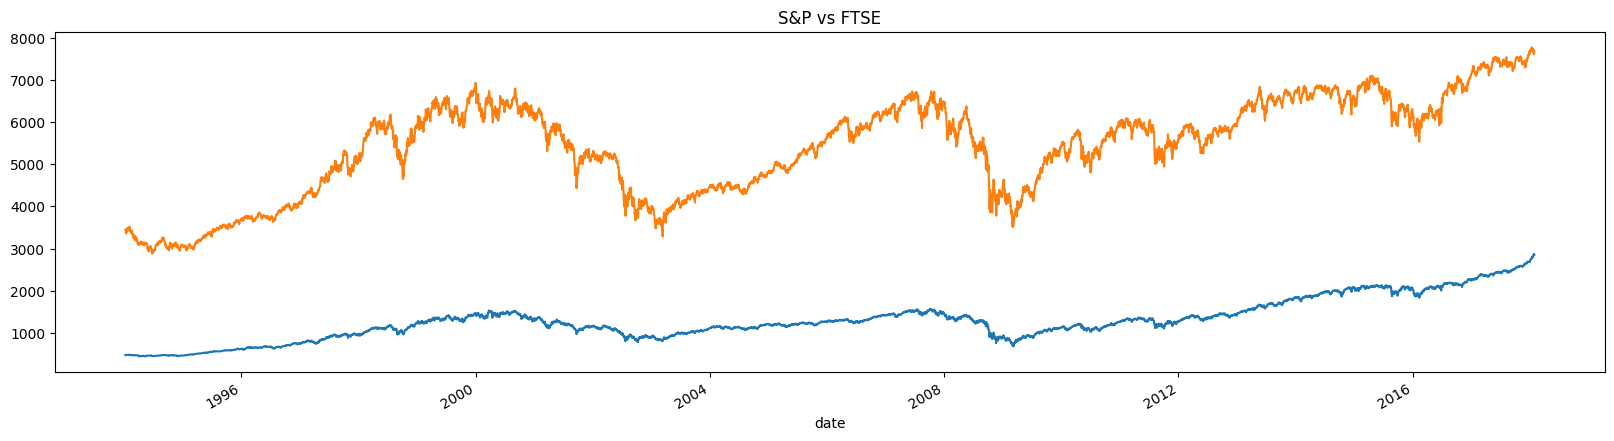

In [43]:
df_ts_1.spx.plot(figsize=(20,5), title  = "S&P5oo Prices")
df_ts_1.ftse.plot(figsize=(20,5), title  = "FTSE Prices")
plt.title("S&P vs FTSE")
plt.show()

#### Zoom In

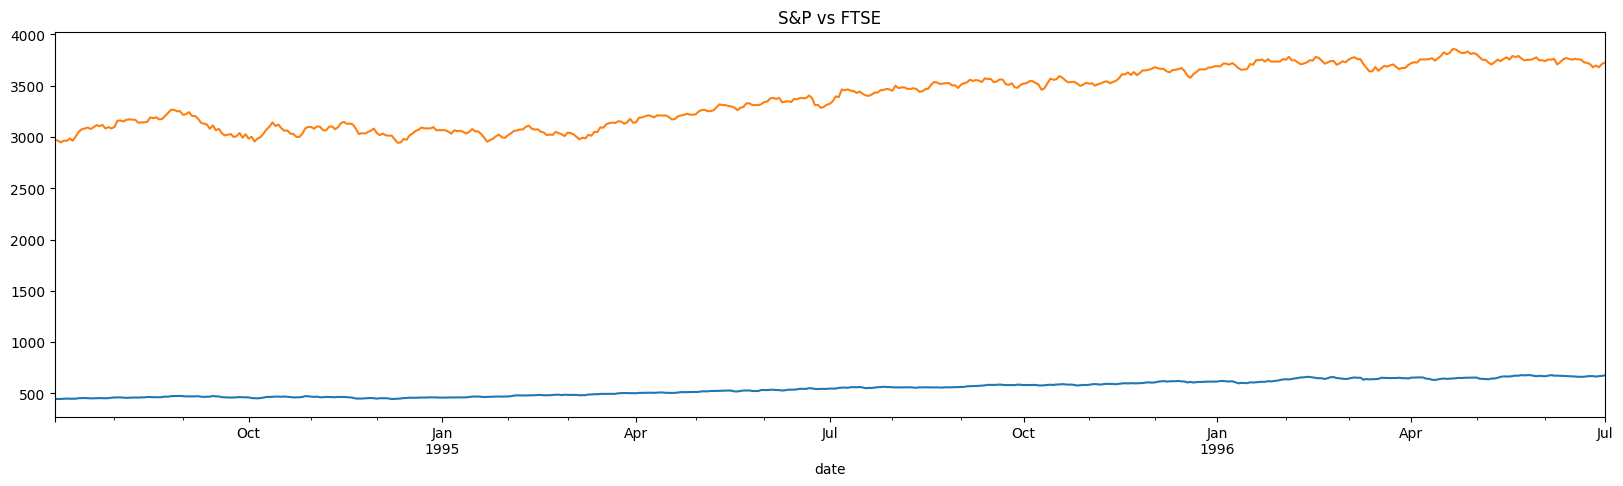

In [47]:
# Plot a subset of the data to check for patterns
df_ts_1[(df_ts_1.index > '1994-07-01') & (df_ts_1.index <= '1996-07-01')].spx.plot(figsize=(20,5), title  = "S&P5oo Prices")
df_ts_1[(df_ts_1.index > '1994-07-01') & (df_ts_1.index <= '1996-07-01')].ftse.plot(figsize=(20,5), title  = "FTSE Prices")
plt.title("S&P vs FTSE")
plt.show()

#### Line Chart without Seasonality

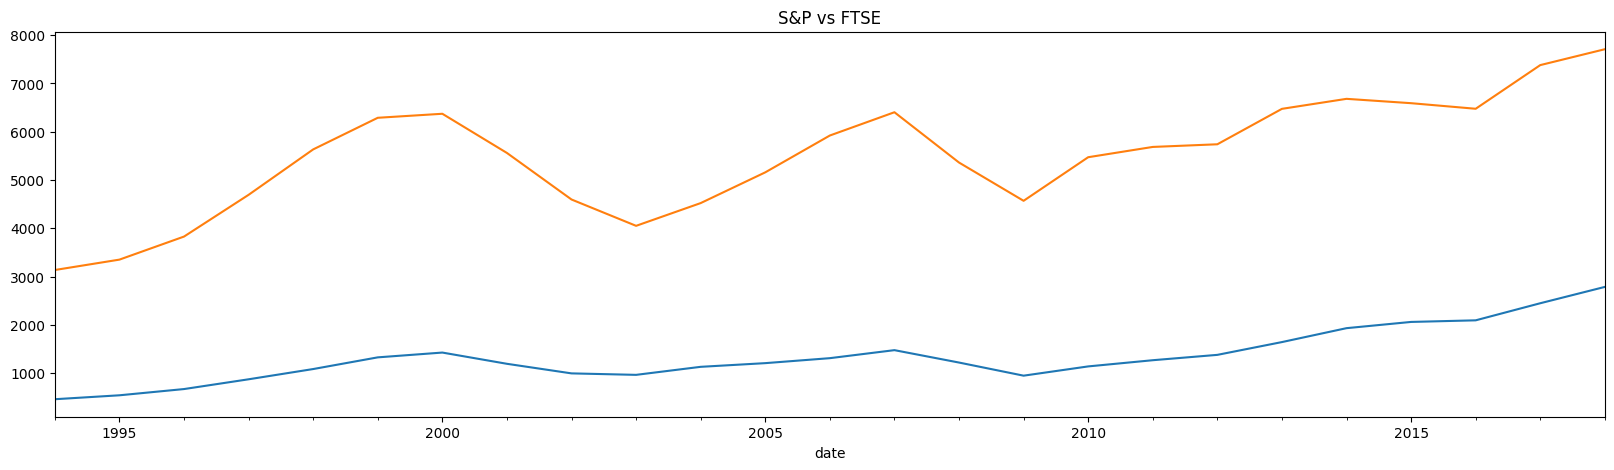

In [93]:
# To view the line chart without seasonality, we can plot an upsampled view of the data
df_ts_1_yr = df_ts_base1.resample('Y', on='date').mean()
df_ts_1_yr.spx.plot(figsize=(20,5), title  = "S&P5oo Prices")
df_ts_1_yr.ftse.plot(figsize=(20,5), title  = "FTSE Prices")
plt.title("S&P vs FTSE")
plt.show()

### Trendline

#### Linear Trendline

<Axes: ylabel='spx'>

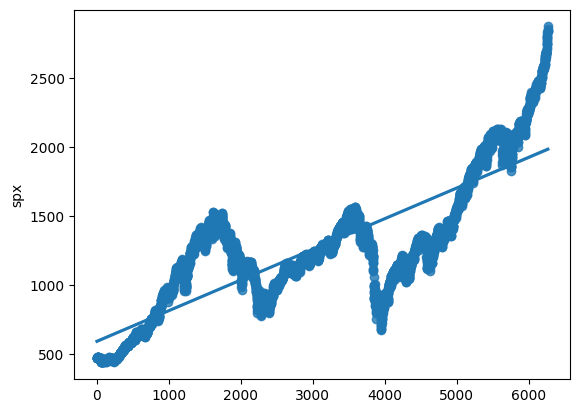

In [90]:
# Use seaborn regplot
# Since this is a scatterplot, date values will not work in the x axis
# We need to use numeric values (e.g. indices) instead
df_ts_2 = df_ts_base1.copy()
sns.regplot(x = df_ts_2.index.values, y=df_ts_2.spx)

#### Ploynomial Trendline

<Axes: ylabel='spx'>

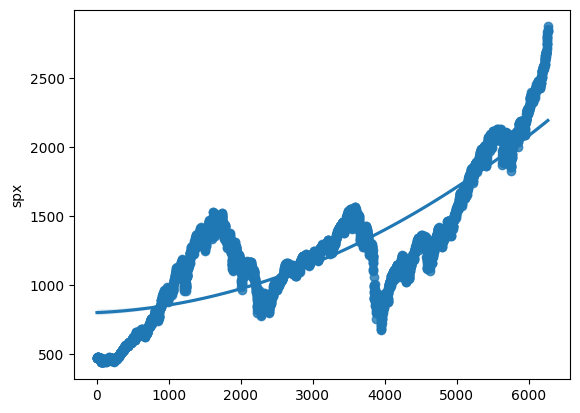

In [92]:
sns.regplot(x = df_ts_2.index.values, y=df_ts_2.spx, order=2)

<Axes: xlabel='total_bill', ylabel='tip'>

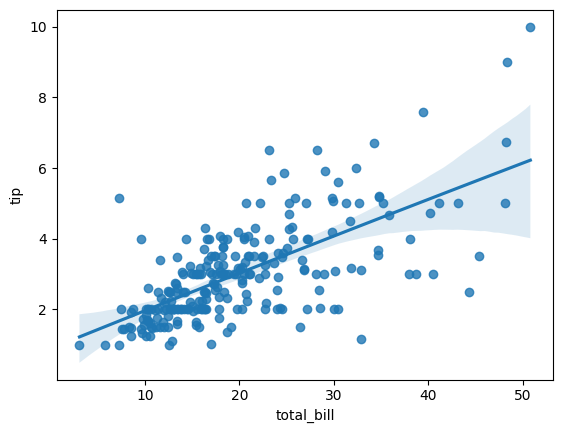

In [91]:
# Trendline for tips data
df_tips = sns.load_dataset('tips')
sns.regplot(x='total_bill',y='tip',data=df_tips,order = 2)

### Lag Plots

In [94]:
df_ts_3 = df_ts_1.copy()
df_ts_3['spx_lag'] = df_ts_3.spx.shift(1)
df_ts_3.head(2)

,spx,dax,ftse,nikkei,spx_int,date,date1,spx_lag
date,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469,1994-01-07,1994-01-07,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,475,1994-01-10,1994-01-10,469.9


#### Using sns scatterplot

<Axes: xlabel='spx', ylabel='spx_lag'>

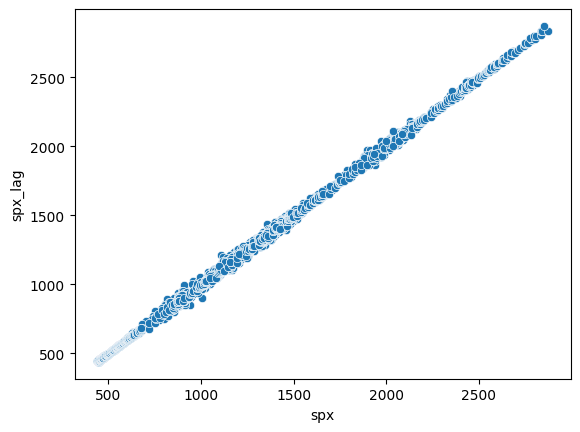

In [95]:
sns.scatterplot(x=df_ts_3.spx, y=df_ts_3.spx_lag)

#### Using pandas lag_plot
https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

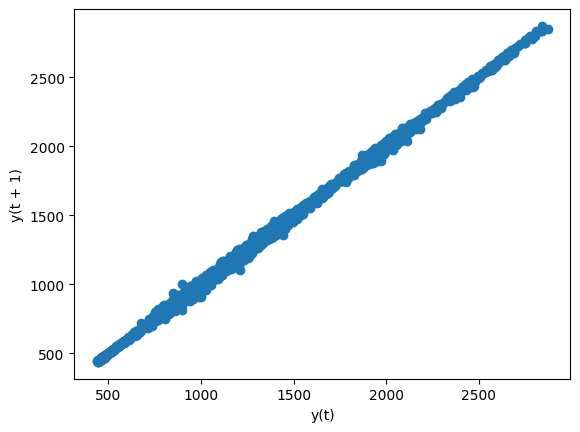

In [96]:
# Helps analyze correlation w.r.t a single lag period
from pandas.plotting import lag_plot
lag_plot(df_ts_3.spx)

### Autocorrelation Plot
https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

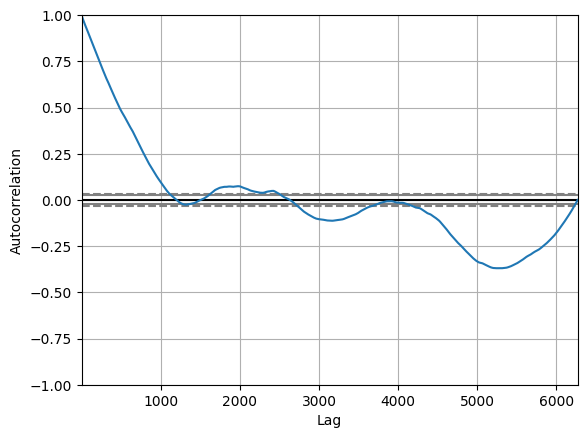

In [97]:
# Can be used to analyze correlation w.r.t. all previous periods
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_ts_3.spx)

### QQ Plot

In [19]:
import scipy.stats as stats
import pylab

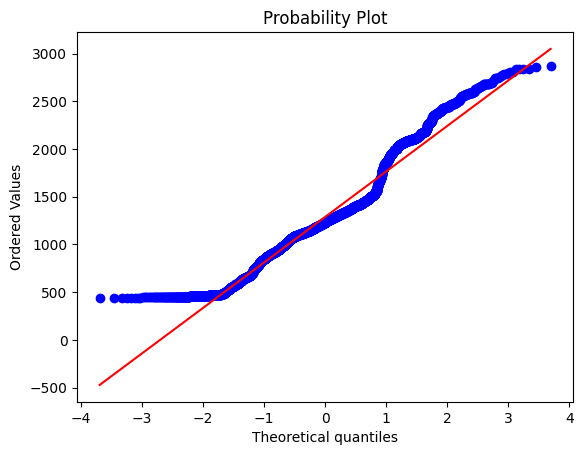

In [21]:
# check how the data fits a normal distribution
# first parameter is the data to plot
# second parameter is the type of plot
stats.probplot(df_ts_base1.spx, plot = pylab)
pylab.show()